In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
def iterationGraph(file1, file2, maxTimestep, title):

    def iterations(file):

        df = pd.read_csv(file)
        df.columns = ['One']
        df['One'] = df['One'].astype('string')
        new = df['One'].str.split(' ', expand = True) 
        df['Time']= new[0].astype('float') 
        df['solverPerfInitRes']= new[1].astype('float') 
        df['residualvf']= new[2].astype('float') 
        df['materialResidual']= new[3].astype('float') 
        df['outerCorrector']= new[4].astype('float') 
        df.drop(columns =['One'], inplace = True) 
        
        return df['outerCorrector']
  
    plt.figure(figsize=(10,5))

    iterations1 = iterations(file1)
    iterations2 = iterations(file2)

    plt.plot(np.arange(1, len(iterations1)+1), iterations1, label = file1_label + "\nTotal Iterations: " + str(sum(iterations1)))#, linestyle='dashed')
    plt.plot(np.arange(1, len(iterations2)+1), iterations2, label = file2_label + "\nTotal Iterations: " + str(sum(iterations2)))#, linestyle='dashed')
    f= 15

    plt.xlabel("Time-step ", fontsize = f)
    plt.ylabel("Iterations", fontsize = f)
    plt.ylim(bottom=0) 
    plt.ticklabel_format(axis="y", style="plain")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),  ncol=2, fontsize = f-3)
    plt.grid(b=True, which='major', axis = 'y', color='#999999', linestyle='-')
    plt.show()

    return iterations1, iterations2
       

# Training time

- ML model = **232.01 s**

This is with verbose turned off and using use python(.py)

- s4f base case = **5.16 s**

This is with only printing the necessary files for ML model and no extra info statements in the log file



# Mesh 100

/tmp/ipykernel_7153/895591784.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis = 'y', color='#999999', linestyle='-')


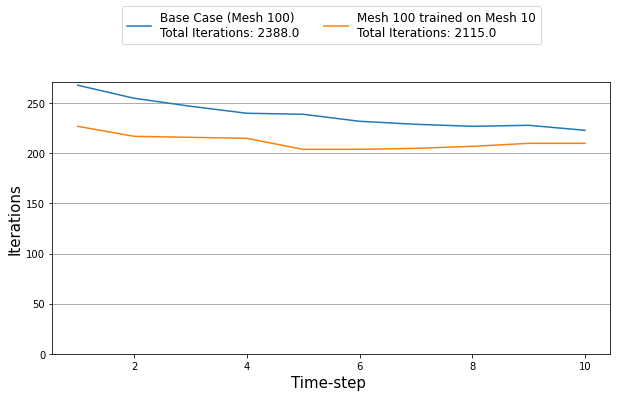

In [82]:
# Define variables

filepath1 = "mesh100/plateHole"
file1_label = "Base Case (Mesh 100)"

filepath2 = "mesh100/plateHole_ML"
file2_label = "Mesh 100 trained on Mesh 10"

maxTimestep = 10

# Define residual files

filepath1 = filepath1 + "/residual.dat"
filepath2 = filepath2 + "/residual.dat"

iterations1, iterations2 = iterationGraph(filepath1, filepath2, maxTimestep, file1_label)


**s4f time** = 1814 s

**s4fML time** = 1378 s

**Total training time** = 237 s

**"Speed-up"** = 1814 - 939 - 237 = 638 s

**Percentage time reduction** = 638/1814 = 35%

These times are without printing "unnessary" files or extra info statements in the log file

# Iteration Time

In [83]:
file1 = "./iterationTime.dat"

def iterationTime(file): 

    df = pd.read_csv(file)
    df.columns = ['One']
    df['One'] = df['One'].astype('string')
    new = df['One'].str.split(' ', expand = True) 
    df['Time']= new[0].astype('float') 
    df['Iteration']= new[1].astype('float') 
    df['ExecutionTime']= new[2].astype('float') 
    df['CPUTime']= new[3].astype('float') 
    df.drop(columns =['One'], inplace = True) 

    return df

filepath1 = "mesh100/plateHole"
file1_label = "Base Case (Mesh 100)"

filepath2 = "mesh100/plateHole_ML"
file2_label = "Mesh 100 trained on Mesh 10"

filepath3 = "mesh10/plateHole"
file3_label = "Mesh 10"

maxTimestep = 10

# Define iteration files

filepath1 = filepath1 + "/iterationTime.dat"
filepath2 = filepath2 + "/iterationTime.dat"
filepath3 = filepath3 + "/iterationTime.dat"


df_1 = iterationTime(filepath1)
df_2 = iterationTime(filepath2)
df_3 = iterationTime(filepath3)

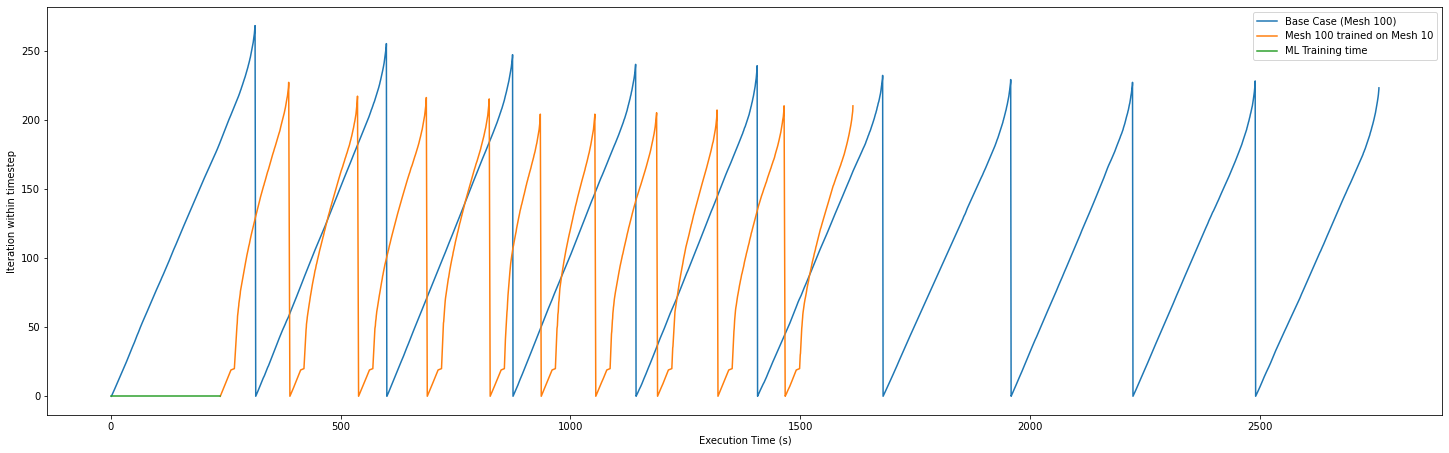

In [90]:
ML_case_time = df_2["ExecutionTime"] + 237

plt.figure(figsize=(25,7.5))
plt.plot(df_1["ExecutionTime"], df_1["Iteration"], label = file1_label) 
plt.plot(ML_case_time, df_2["Iteration"], label = file2_label) 
plt.plot(np.arange(0, 238), np.zeros(238), label = "ML Training time")
plt.xlabel("Execution Time (s)")
plt.ylabel("Iteration within timestep")
plt.legend()

Text(0, 0.5, 'Iteration within timestep')

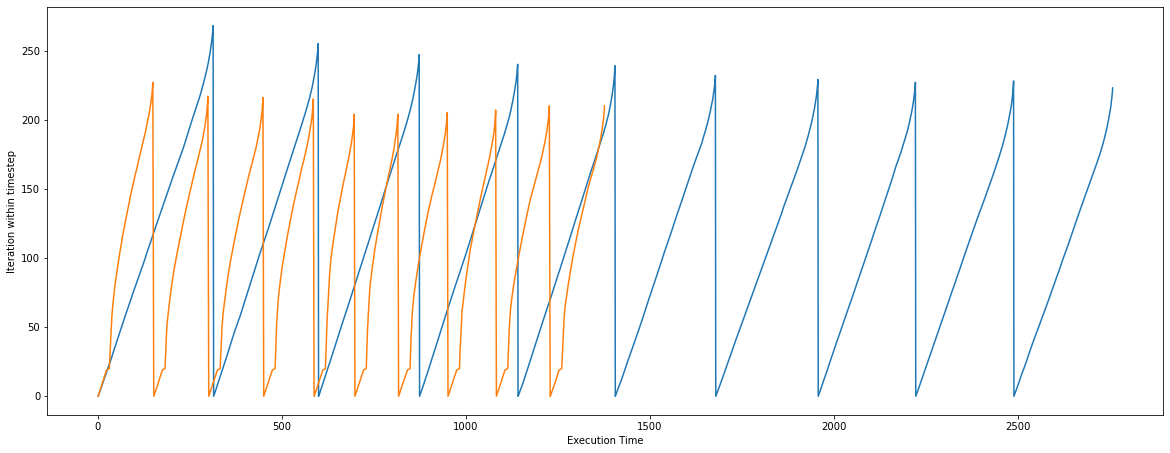

In [92]:
plt.figure(figsize=(20,7.5))
plt.plot(df_1["ExecutionTime"], df_1["Iteration"]) 
plt.plot(df_2["ExecutionTime"], df_2["Iteration"]) 
plt.xlabel("Execution Time")
plt.ylabel("Iteration within timestep")